In [102]:
import pandas as pd
from matplotlib import dates
from tsai.basics import *
import matplotlib.pyplot as plt
from matplotlib import dates as mdates
import numpy as np

In [103]:
df = pd.read_csv('../data/SET_SOLFSMY.TXT', sep='\s+', comment='#', header=None, 
                     names=['JulianDay', 'S10', 'M10', 'Y10','F10'], usecols=[5,6,8,10,12])

column_names = ['JulianDay', 'Var_1', 'Var_2', 'Var_3', 'Var_4', 'Var_5', 'Var_6', 'Var_7', 'Var_8']

df = pd.read_csv('../data/SET_SOLFSMY.TXT', sep='\s+', comment='#', names=column_names, usecols=range(5, 14))

df['Date'] = pd.to_datetime(df['JulianDay'], unit='D', origin='julian')
df = df[df['Date'].dt.time == pd.to_datetime('12:00:00').time()].reset_index(drop=True)


df.head()

,JulianDay,Var_1,Var_2,Var_3,Var_4,Var_5,Var_6,Var_7,Var_8,Date
0,2456172.0,122.3,97.9,140.1,118.1,141.8,124.9,145.6,120.5,2012-09-01 12:00:00
1,2456173.0,124.7,98.1,142.9,118.1,141.3,124.9,142.3,120.0,2012-09-02 12:00:00
2,2456174.0,123.0,98.2,141.0,118.2,137.1,124.8,141.6,119.6,2012-09-03 12:00:00
3,2456175.0,118.9,98.3,143.5,118.3,139.9,124.8,137.6,119.1,2012-09-04 12:00:00
4,2456176.0,117.7,98.4,142.1,118.4,138.5,124.7,132.7,118.8,2012-09-05 12:00:00


In [104]:
df.isna().sum()

JulianDay    0
Var_1        0
Var_2        0
Var_3        0
Var_4        0
Var_5        0
Var_6        0
Var_7        0
Var_8        0
Date         0
dtype: int64

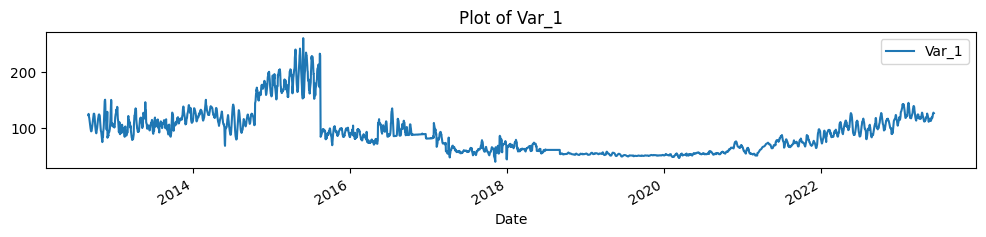

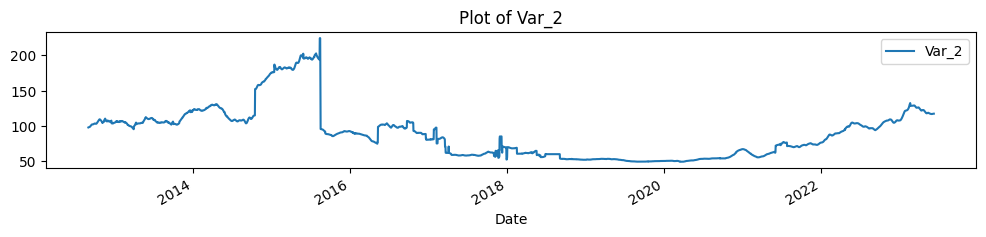

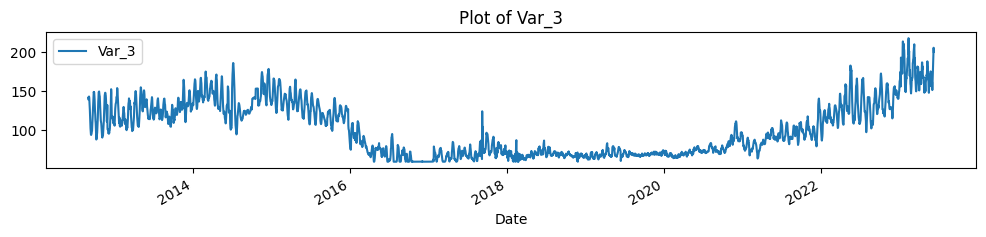

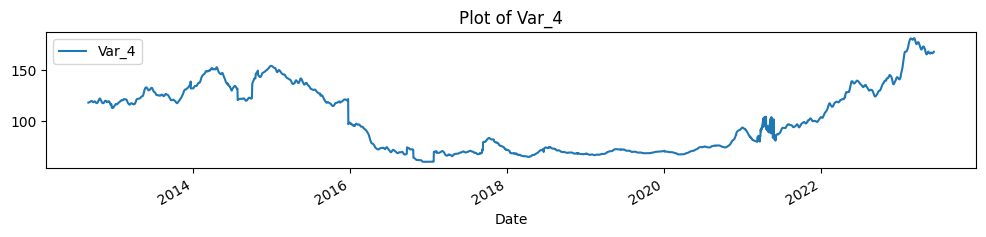

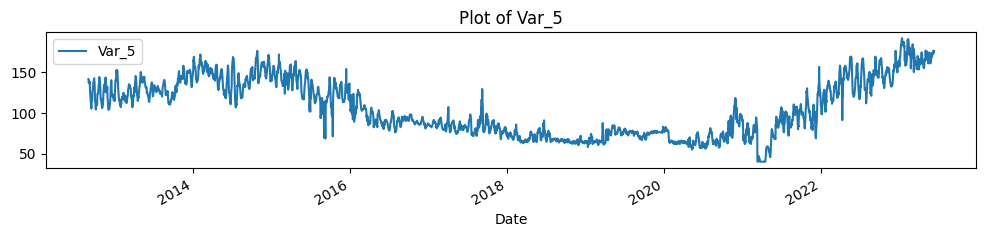

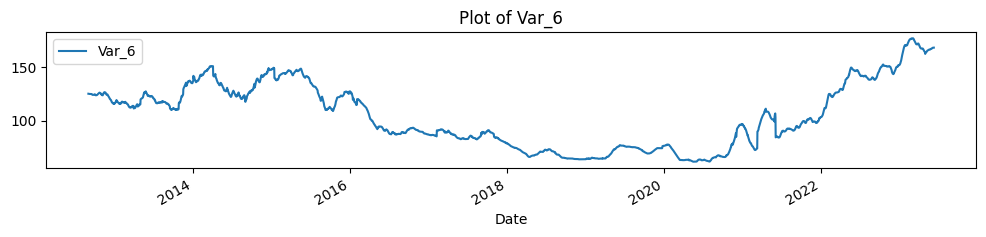

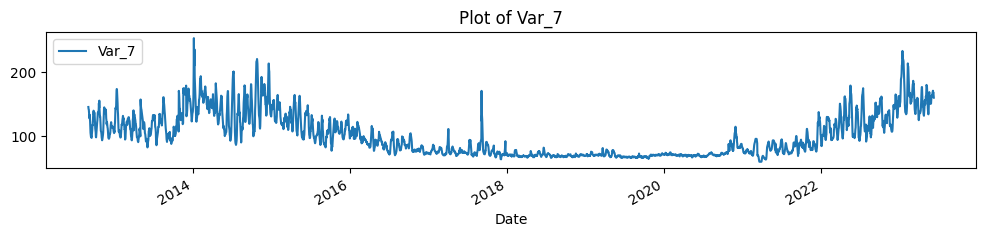

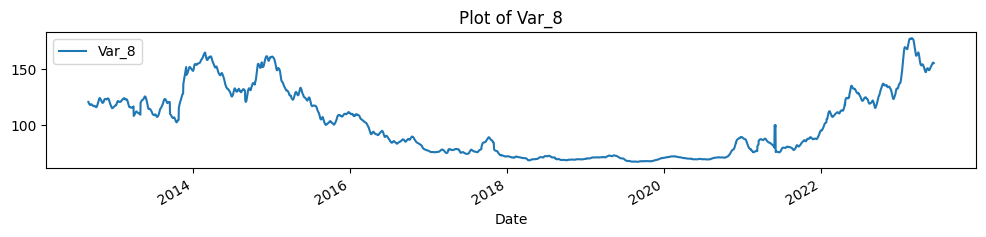

In [105]:
for i in range(1, 9):
    df.plot(x='Date', y=f'Var_{i}', figsize=(12, 2))
    plt.title(f'Plot of Var_{i}')
    plt.show()

Let's import now our data in order to compare the two datasets and find out which variable is which and if they are identical.

In [106]:
df_types = yaml2dict('./preprocessed_data/dtypes/solfsmy.yaml')


df_original = pd.read_csv('./preprocessed_data/dataframes/solfsmy.csv', dtype=df_types)
df_original.Date = pd.to_datetime(df_original.Date)

df_original = df_original[(df_original.Date >= df.Date.min()) & (df_original.Date <= df.Date.max())]
df_original.head(1)

,Year,DDD,JulianDay,F10,F81c,S10,S81c,M10,M81c,Y10,Y81c,Ssrc,Ssrc_F10,Ssrc_S10,Ssrc_M10,Ssrc_Y10,Date
5722,2012,245,2456172.0,145.600006,118.099998,151.5,127.199997,138.5,116.699997,141.800003,124.099998,1811,1,8,1,1,2012-09-01 12:00:00


In [107]:
head_original = df_original[['F10', 'M10', 'S10', 'Y10', 'Date']].head(10), 
head_df = df[['Var_1', 'Var_2', 'Var_3', 'Var_4','Var_5', 'Var_6', 'Var_7', 'Var_8', 'Date']].head(10)

head_original, head_df

((             F10         M10         S10         Y10                Date
  5722  145.600006  138.500000  151.500000  141.800003 2012-09-01 12:00:00
  5723  142.300003  141.199997  150.500000  141.300003 2012-09-02 12:00:00
  5724  141.600006  139.399994  149.500000  137.100006 2012-09-03 12:00:00
  5725  137.600006  141.800003  149.199997  139.899994 2012-09-04 12:00:00
  5726  132.699997  140.399994  146.500000  138.500000 2012-09-05 12:00:00
  5727  128.000000  135.500000  141.000000  136.500000 2012-09-06 12:00:00
  5728  133.399994  131.100006  135.500000  138.699997 2012-09-07 12:00:00
  5729  128.600006  124.400002  132.500000  131.399994 2012-09-08 12:00:00
  5730  123.000000  113.699997  128.100006  125.800003 2012-09-09 12:00:00
  5731  112.300003  108.300003  120.500000  121.800003 2012-09-10 12:00:00,),
    Var_1  Var_2  Var_3  Var_4  Var_5  Var_6  Var_7  Var_8                Date
 0  122.3   97.9  140.1  118.1  141.8  124.9  145.6  120.5 2012-09-01 12:00:00
 1  124.7   98

The variables 2, 4, 6, 8 seems to be a rolling mean of the real values which are 1, 3, 5, 7. Also, comparing our values with these variables it seams that the correspondece between this data and ours is:
- Var_1 --> S10
- Var_3 --> Y10
- Var_5 --> M10
- Var_7 --> F10  

So, we are going to select and rename them as follows:

In [108]:
df.drop(columns=['Var_2', 'Var_4', 'Var_6', 'Var_8'], inplace=True)
df.rename({'Var_1': 'S10', 'Var_3': 'Y10', 'Var_5': 'M10', 'Var_7': 'F10'}, axis=1, inplace=True)

df.head()

,JulianDay,S10,Y10,M10,F10,Date
0,2456172.0,122.3,140.1,141.8,145.6,2012-09-01 12:00:00
1,2456173.0,124.7,142.9,141.3,142.3,2012-09-02 12:00:00
2,2456174.0,123.0,141.0,137.1,141.6,2012-09-03 12:00:00
3,2456175.0,118.9,143.5,139.9,137.6,2012-09-04 12:00:00
4,2456176.0,117.7,142.1,138.5,132.7,2012-09-05 12:00:00


And now we are going to check how both dataframes are related:

In [109]:
thresholds = {
    'F10':  [(0,75), (76,150), (151,190), (191, df_original['F10'].max())],
    'S10': [(0,65), (66,150), (151,215), (216, df_original['S10'].max())],
    'M10': [(0,72), (73,144), (145,167), (168, df_original['M10'].max())],
    'Y10': [(0,81), (82,148), (149,165), (166, df_original['Y10'].max())]
}

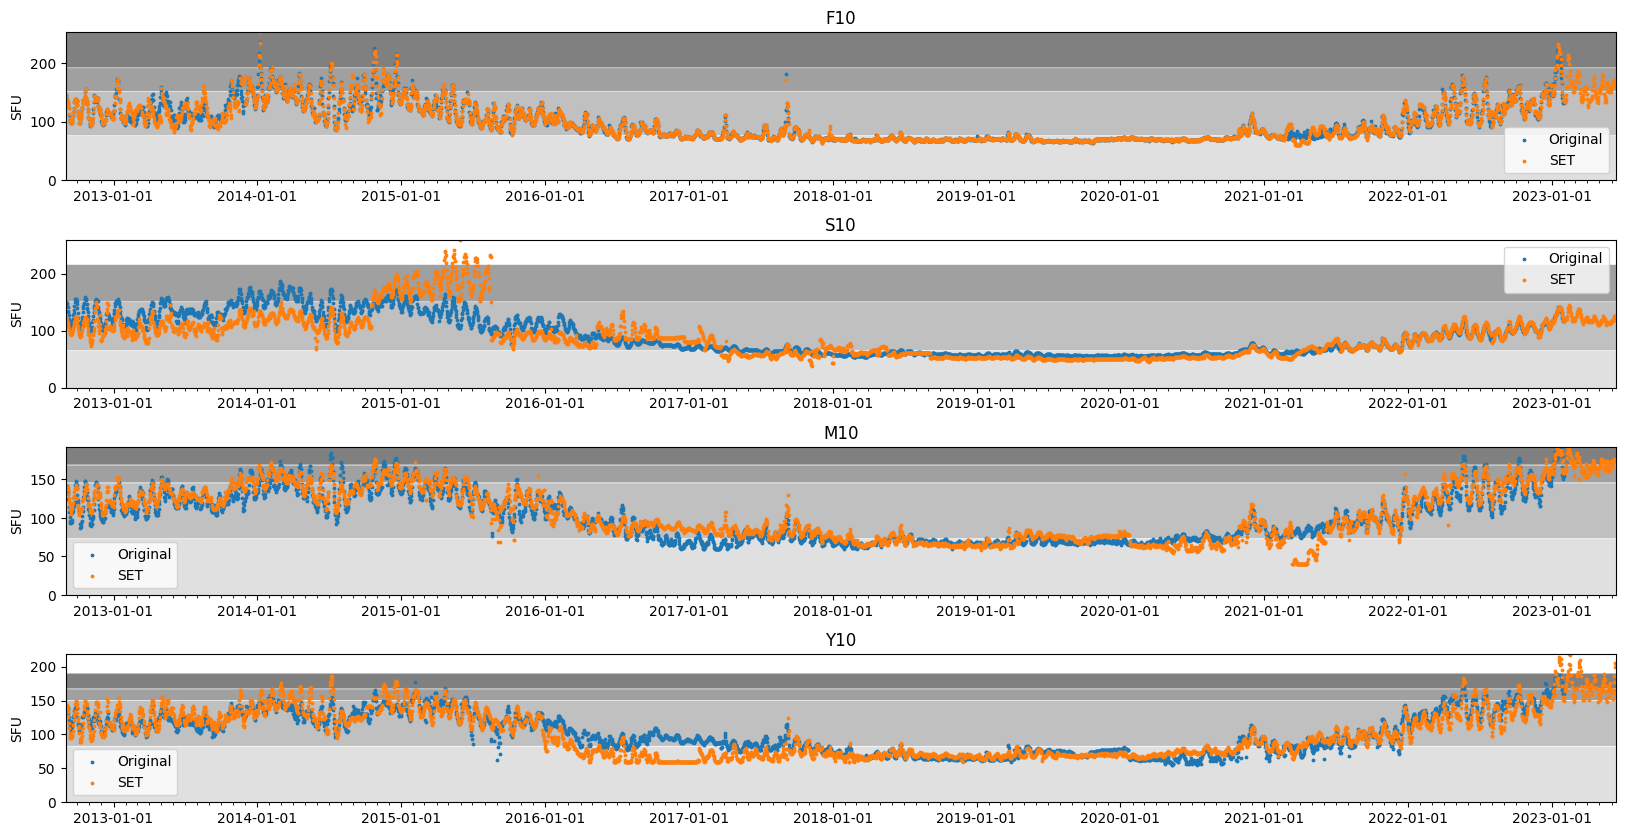

In [116]:
fig, ax = plt.subplots(4, 1, figsize=(20, 10))

plt.subplots_adjust(hspace=0.4)

for i, var in enumerate(['F10', 'S10', 'M10', 'Y10']):
    ax[i].scatter(df_original.Date, df_original[var], label='Original', s=3)
    ax[i].scatter(df.Date, df[var],
               label='SET', s=3)
    ax[i].set_title(var)
    ax[i].set_ylabel('SFU')  # Add y-axis label with SFU
    ax[i].legend()
    ax[i].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d')) # format x-axis ticks
    ax[i].xaxis.set_minor_locator(mdates.MonthLocator()) # set x-axis ticks to be yearly
    
    set_ranges = np.zeros((int(df[var].max()), df.shape[0], 4)) # (Height, Width)

    for j, (start, end) in enumerate(thresholds[var]):
        set_ranges[int(start):int(end), :, :] = [0, 0, 0, ((j + 1) / 4)]
   
    ax[i].imshow(set_ranges, extent=[df.Date.min(), df.Date.max(), 0, df[var].max()], aspect='auto', alpha=0.5, origin='lower')